# A Data-Driven Analysis to Choose the Optimal Downtown Austin, TX Location for Your Fusion Food Truck and Bar 

For my IBM Data Science Professional Certificate I analyzed downtown Austin, TX to determine an optimal location for a new fusion food truck and bar. To gather and visualize data on potential locations, I utilized several tools, including BeautifulSoup, GeoPy, and an API to FourSquare.

With the use of BeautifulSoup, I scraped information on all the neighborhoods present in downtown Austin, while GeoPy enabled me to geocode the addresses of each neighborhood. This allowed me to accurately locate each neighborhood on a map, providing crucial insight into their distances from other significant landmarks and establishments in the area.

In addition, I utilized the Foursquare API to access information on the various types of establishments and businesses present in each neighborhood, such as restaurants, bars, coffee shops, and more. This provided key data points that helped me to collect information on the venues in the area and their respective locations.

To segment the neighborhoods in my analysis, I utilized kMeans clustering, an unsupervised machine learning algorithm that helped group similar neighborhoods together based on the types of establishments and businesses that were present in each one. This allowed me to better understand which neighborhoods had similar market conditions and potential competition.

In conducting my analysis, I considered several key factors such as foot traffic, accessibility, and visibility when identifying potential locations. My primary focus was on evaluating the existing competition in the area and identifying any gaps in the market that a new food truck and bar could potentially fill, recognizing that selecting the right location is crucial for the success of any new business venture.

In [1]:
# Importing libraries
import numpy as np 
import pandas as pd 

# Coverting text addresses to latitude and longitude coordinates
from geopy.geocoders import Nominatim 
import geocoder 

# For webscraping
import requests
from bs4 import BeautifulSoup 

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

# Map rendering library
import folium 

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

print("Libraries imported.")

Libraries imported.


In [2]:
# Specify the URL and create BeautifulSoup instance
url = "https://en.wikipedia.org/wiki/List_of_Austin_neighborhoods"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

# Find the table element with the class "wikitable"
table = soup.find("table", {"class": "wikitable"})

# Find all rows in the table
rows = table.find_all("tr")

# Initialize an empty list to store the text from the first column of each row
neighborhoods = []

# Loop through each row and extract the text from the first column
for i, row in enumerate(rows):
    
    # Skip the first row, which contains the column headers
    if i == 0:
         continue
    
    # Find all "th" elements in the row
    th_elements = row.find_all("th")
    if len(th_elements) > 0:
        # Get the text from the first "th" element
        first_col = th_elements[0].get_text().strip()
        neighborhoods.append(first_col)

print(neighborhoods)

['Bryker Woods', 'Caswell Heights', 'Downtown Austin', 'Eastwoods', 'Hancock', 'Heritage', 'Hyde Park', "Judges' Hill", 'Lower Waller Creek', 'North University', 'Oakmont Heights', 'Old Enfield', 'Old Pecan Street', 'Old West Austin', 'Original Austin', 'Original West University', 'Pemberton Heights', 'Ridgelea', 'Ridgetop', 'Rosedale', 'Shoal Crest', 'West Downtown']


In [3]:
# Convert to pd dataframe
neighborhoods= pd.DataFrame({"neighborhood": neighborhoods})
neighborhoods

,neighborhood
0,Bryker Woods
1,Caswell Heights
2,Downtown Austin
3,Eastwoods
4,Hancock
5,Heritage
6,Hyde Park
7,Judges' Hill
8,Lower Waller Creek
9,North University


This next function was built to use the geocoder library to obtain the latitude and longitude of a given area in Austin, TX. 

In [4]:
# define a function to get coordinates
def get_latlng(area):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Austin, TX'.format(area))
        lat_lng_coords = g.latlng
    return lat_lng_coords

In [5]:
# Creating a list of latitude and longitude coordinates for each neighborhood
coords = [get_latlng(area) for area in neighborhoods["neighborhood"].tolist()]
coords

[[30.305032315697154, -97.75419197768613],
 [30.307900653985847, -97.71939378850581],
 [30.271700000000067, -97.75333999999998],
 [30.290490000000034, -97.73166999999995],
 [30.297150000000045, -97.72661999999997],
 [30.285859995189057, -97.77105500817814],
 [30.30857000000003, -97.72827999999998],
 [33.10986700290148, -97.39386778678578],
 [30.25965000000008, -97.74111999999997],
 [30.297030000000063, -97.73576999999995],
 [30.321614956373793, -97.75073098781029],
 [30.27946313008819, -97.7526604889718],
 [30.271666781384603, -97.63735442697372],
 [30.27475000000004, -97.76125999999994],
 [30.23264800000004, -97.86485199999998],
 [30.288140000000055, -97.74727999999999],
 [30.289817122455737, -97.75336093729071],
 [30.312308837205496, -97.75081919369181],
 [30.41806377298552, -97.90000089893287],
 [30.31221000000005, -97.74755999999996],
 [30.2967279127853, -97.74795369559789],
 [30.265340000000037, -97.74648999999994]]

In [6]:
# create temporary dataframe to populate the coordinates into Latitude and Longitude
df_coords = pd.DataFrame(coords, columns=['latitude', 'longitude'])

In [7]:
# merge the coordinates into the original dataframe
neighborhoods['latitude'] = df_coords['latitude']
neighborhoods['longitude'] = df_coords['longitude']

In [8]:
# Examine the df with the coordinates
neighborhoods

,neighborhood,latitude,longitude
0,Bryker Woods,30.305032,-97.754192
1,Caswell Heights,30.307901,-97.719394
2,Downtown Austin,30.271700,-97.753340
3,Eastwoods,30.290490,-97.731670
4,Hancock,30.297150,-97.726620
5,Heritage,30.285860,-97.771055
6,Hyde Park,30.308570,-97.728280
7,Judges' Hill,33.109867,-97.393868
8,Lower Waller Creek,30.259650,-97.741120
9,North University,30.297030,-97.735770


Now that we have the coordinates of each neighborhood, we need to use the geopy library to obtain the latitude and longitude coordinates for the city of Austin, TX

In [9]:
# Set the address for which to obtain coordinates
address = 'Austin, TX'

# Create a geolocator object with the user_agent set to 'Austin, TX'
geolocator = Nominatim(user_agent="Austin, TX")

# Use the geolocator to get the location information for the specified address
location = geolocator.geocode(address)

# Extract the latitude and longitude coordinates from the location information
latitude = location.latitude
longitude = location.longitude

# Print the resulting coordinates
print('The geograpical coordinate of Austin, TX is {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Austin, TX is 30.2711286, -97.7436995.


Next, I created a map of Austin, TX using the folium libary and added circle markers to the map for each neighborhood

In [10]:
# Create a map centered on Austin using the latitude and longitude coordinates obtained previously
map_austin = folium.Map(location=[latitude, longitude], zoom_start=11)

# Add markers to the map for each neighborhood in the neighborhoods dataframe
for lat, lng, neighborhood in zip(neighborhoods['latitude'], neighborhoods['longitude'], neighborhoods['neighborhood']):
    # Create a label for the marker that includes the neighborhood name and its latitude and longitude coordinates
    label = '{} (Lat: {}, Long: {})'.format(neighborhood, lat, lng)
    # Create a circle marker at the neighborhood's latitude and longitude coordinates and add it to the map
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=folium.Popup(label, parse_html=False), # Set parse_html to False to prevent rendering issues
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_austin)  
    
# Display the map
map_austin

As we are primarily interested in exploring the neighborhoods in central Austin, we will exclude some of the neighborhoods that are not relevant to our analysis.

In [11]:
# Define a list of neighborhood names to exclude
exclude_list = ["Ridgetop", "Old Pecan Street", "Original Austin", "Judges' Hill"]

# Exclude the rows containing the specified neighborhood names
neighborhoods = neighborhoods[~neighborhoods["neighborhood"].isin(exclude_list)]
neighborhoods

,neighborhood,latitude,longitude
0,Bryker Woods,30.305032,-97.754192
1,Caswell Heights,30.307901,-97.719394
2,Downtown Austin,30.271700,-97.753340
3,Eastwoods,30.290490,-97.731670
4,Hancock,30.297150,-97.726620
5,Heritage,30.285860,-97.771055
6,Hyde Park,30.308570,-97.728280
8,Lower Waller Creek,30.259650,-97.741120
9,North University,30.297030,-97.735770
10,Oakmont Heights,30.321615,-97.750731


Next, we will establish a connection to Foursquare by utilizing their developers API. This will allow us to access their vast database of existing venues and start analyzing them for our purposes.

In [12]:
CLIENT_ID = 'SUTYD515UCUHLSATT4Q5UCIEABS3J1BT0KF3ULVLM0Z0YPY3' # your Foursquare ID
CLIENT_SECRET = 'NKPPMQFSPMWE2UKULOSC05Q3HDZM5LW1OW1RCLSRAKJ5AKLX' # your Foursquare Secret
ACCESS_TOKEN = 'fsq3x+eQg38ckXCrGiLM+SRXQ9YE0TX8LjpKu0TJ8Y0qwIE=' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 500
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: SUTYD515UCUHLSATT4Q5UCIEABS3J1BT0KF3ULVLM0Z0YPY3
CLIENT_SECRET:NKPPMQFSPMWE2UKULOSC05Q3HDZM5LW1OW1RCLSRAKJ5AKLX


This function takes in a list of neighborhood names, along with corresponding latitude and longitude coordinates, and uses the Foursquare API to find nearby venues for each neighborhood within a certain radius. It returns a pandas dataframe with information about each nearby venue, including the name of the venue, its latitude and longitude coordinates, and its category

In [13]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):

    # Initialize an empty list to store venue information for each neighborhood
    venues_list=[]

    # Loop through each neighborhood in the input lists
    for name, lat, lng in zip(names, latitudes, longitudes):
        # Print the name of the neighborhood to indicate progress
        print(name)
            
        # Create the API request URL for the current neighborhood
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # Make the GET request to the Foursquare API
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # For each nearby venue, extract relevant information and add it to the venues_list
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    # Convert the venues_list into a pandas dataframe
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])

    # Rename the columns of the dataframe
    nearby_venues.columns = ['neighborhood', 
                  'latitude', 
                  'longitude', 
                  'venue', 
                  'venue latitude', 
                  'venue longitude', 
                  'venue category']
    
    return(nearby_venues)

Let's now create some variables from the neighborhoods dataframe and then call the previously defined function with the new variables as inputs

In [14]:
# Extract neighborhood names, latitudes, and longitudes from the neighborhoods dataframe
names = neighborhoods.loc[:,'neighborhood']
longitudes = neighborhoods['longitude']
latitudes = neighborhoods['latitude']

# Call the getNearbyVenues function with the neighborhood names, latitudes, and longitudes as inputs
neighborhood_venues = getNearbyVenues(names, latitudes, longitudes)

# Display the first five rows of the resulting dataframe
neighborhood_venues.head()

Bryker Woods
Caswell Heights
Downtown Austin
Eastwoods
Hancock
Heritage
Hyde Park
Lower Waller Creek
North University
Oakmont Heights
Old Enfield
Old West Austin
Original West University
Pemberton Heights
Ridgelea
Rosedale
Shoal Crest
West Downtown


,neighborhood,latitude,longitude,venue,venue latitude,venue longitude,venue category
0,Bryker Woods,30.305032,-97.754192,Tiny's Milk And Cookies,30.305971,-97.749950,Bakery
1,Bryker Woods,30.305032,-97.754192,Tiny Boxwoods,30.306058,-97.749789,American Restaurant
2,Bryker Woods,30.305032,-97.754192,Kerbey Lane Café,30.308030,-97.750470,Café
3,Bryker Woods,30.305032,-97.754192,Olive & June,30.307450,-97.751046,Italian Restaurant
4,Bryker Woods,30.305032,-97.754192,Austin Flower Delivery,30.307787,-97.751224,Flower Shop


Let's check for how many of each category occurs

In [15]:
# Getting counts of each venue category
neighborhood_venues['venue category'].value_counts()

Bar                                         24
Coffee Shop                                 21
Food Truck                                  16
Spa                                         13
Park                                        11
Gym / Fitness Center                        10
Cocktail Bar                                10
Clothing Store                              10
Hotel                                       10
Sandwich Place                              10
Grocery Store                               10
Mexican Restaurant                           9
Café                                         8
American Restaurant                          8
Yoga Studio                                  7
Italian Restaurant                           7
Restaurant                                   7
Gym                                          6
Taco Place                                   6
Pizza Place                                  6
Trail                                        5
Pet Store    

I primarily wanted to analyze where existing food and bar establishments are so we will create a new variable called 'bar_venues' that will be worked with going forward

In [16]:
# Filter the dataframe to only include rows where the "venue category" column contains the pattern
bar_venues = neighborhood_venues[neighborhood_venues['venue category'].str.contains(
    r'\b(?:Pub|Bar|Restaurant|Food)\b', case=False)]

In [17]:
bar_venues.head(10)

,neighborhood,latitude,longitude,venue,venue latitude,venue longitude,venue category
1,Bryker Woods,30.305032,-97.754192,Tiny Boxwoods,30.306058,-97.749789,American Restaurant
3,Bryker Woods,30.305032,-97.754192,Olive & June,30.307450,-97.751046,Italian Restaurant
11,Bryker Woods,30.305032,-97.754192,Brick Oven on 35th,30.307610,-97.750941,Italian Restaurant
16,Bryker Woods,30.305032,-97.754192,Snow Pea,30.308604,-97.751517,Asian Restaurant
30,Caswell Heights,30.307901,-97.719394,Vamonos,30.308467,-97.715310,Tex-Mex Restaurant
53,Downtown Austin,30.271700,-97.753340,Snap Kitchen,30.271904,-97.754632,American Restaurant
57,Downtown Austin,30.271700,-97.753340,Whole Foods Lamar Bistro,30.270947,-97.753559,American Restaurant
58,Downtown Austin,30.271700,-97.753340,Four Brothers Venezuelan Food,30.272202,-97.753647,Food Truck
67,Downtown Austin,30.271700,-97.753340,Fresa's Chicken al Carbon,30.274534,-97.752194,Mexican Restaurant
69,Downtown Austin,30.271700,-97.753340,The Grove Wine Bar & Kitchen - Downtown,30.270576,-97.751099,Wine Bar


In [18]:
bar_venues.shape

(138, 7)

Let's one-hot encode the data to do some further analysis and set up for clustering to group neighborhoods that have similiar establishments to one another

In [19]:
# one hot encoding
neighborhood_onehot = pd.get_dummies(bar_venues[['venue category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
neighbs = bar_venues['neighborhood']
neighborhood_onehot.insert(0,'neighborhood',neighbs)
neighborhood_onehot.head()

,neighborhood,American Restaurant,Asian Restaurant,Bar,Beer Bar,Cajun / Creole Restaurant,Chinese Restaurant,Cocktail Bar,Dim Sum Restaurant,Dive Bar,Fast Food Restaurant,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Gay Bar,Gluten-free Restaurant,Hookah Bar,Hotel Bar,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Mediterranean Restaurant,Mexican Restaurant,New American Restaurant,Pub,Restaurant,Seafood Restaurant,Sports Bar,Sushi Restaurant,Tex-Mex Restaurant,Tiki Bar,Wine Bar
1,Bryker Woods,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Bryker Woods,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
11,Bryker Woods,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
16,Bryker Woods,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30,Caswell Heights,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [20]:
neighborhood_onehot.shape

(138, 34)

Now, let's group by the neighborhood and take the average frequency of each type of establishment

In [21]:
neighborhood_grouped = neighborhood_onehot.groupby('neighborhood').mean().reset_index()
neighborhood_grouped.head()

,neighborhood,American Restaurant,Asian Restaurant,Bar,Beer Bar,Cajun / Creole Restaurant,Chinese Restaurant,Cocktail Bar,Dim Sum Restaurant,Dive Bar,Fast Food Restaurant,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Gay Bar,Gluten-free Restaurant,Hookah Bar,Hotel Bar,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Mediterranean Restaurant,Mexican Restaurant,New American Restaurant,Pub,Restaurant,Seafood Restaurant,Sports Bar,Sushi Restaurant,Tex-Mex Restaurant,Tiki Bar,Wine Bar
0,Bryker Woods,0.250000,0.25,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
1,Caswell Heights,0.000000,0.00,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.000000
2,Downtown Austin,0.103448,0.00,0.344828,0.0,0.0,0.034483,0.068966,0.034483,0.0,0.0,0.0,0.0,0.068966,0.0,0.0,0.0,0.0,0.0,0.0,0.034483,0.0,0.034483,0.034483,0.034483,0.034483,0.0,0.034483,0.034483,0.034483,0.0,0.0,0.0,0.068966
3,Eastwoods,0.250000,0.00,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.250000,0.000000,0.5,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
4,Hancock,0.000000,0.00,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000


Now we have a much smaller df to examine

In [22]:
neighborhood_grouped.shape

(16, 34)

Next, let's visualize the top 3 venue frequency for each neighborhood

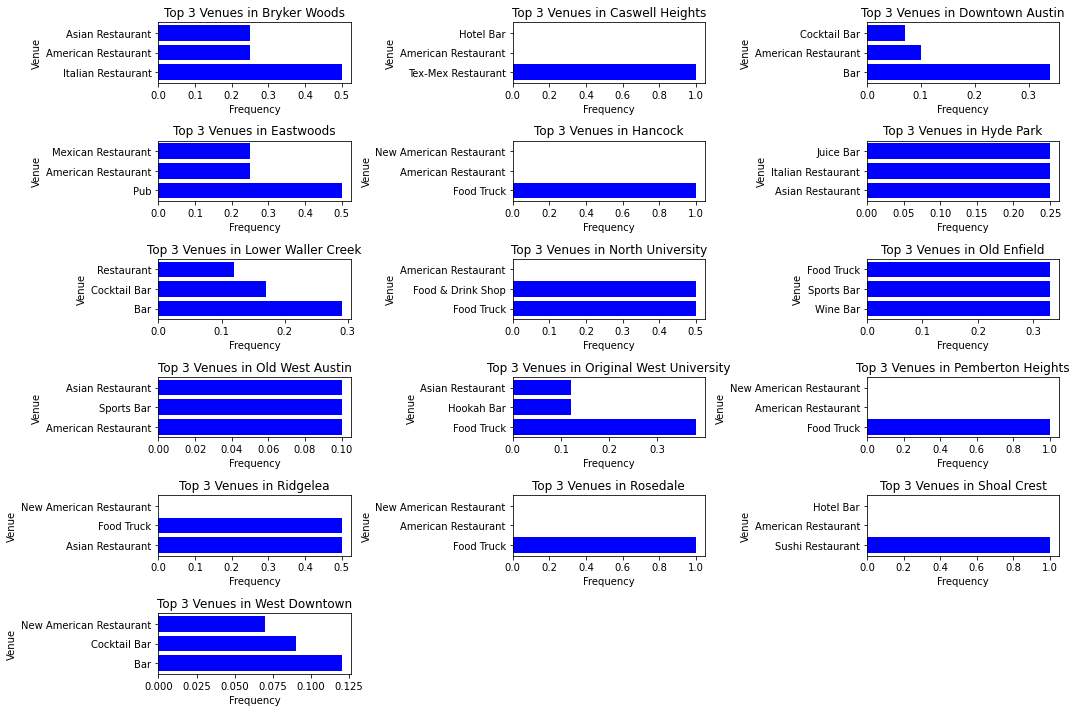

In [23]:
# Set the number of top venues to display for each neighborhood
num_top_venues = 3 

# Count the number of neighborhoods in the neighborhood_grouped DataFrame
num_neighborhoods = len(neighborhood_grouped)

# Calculate the number of rows and columns needed for the subplots
num_rows = int(num_neighborhoods / 3) + (num_neighborhoods % 3 > 0)
num_cols = 3

# Create a new figure with a matrix of subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))

# Flatten the axs array to simplify indexing
axs = axs.flatten()

# Loop through all the neighborhoods and create a horizontal bar chart for each one
for i, neighborhood in enumerate(neighborhood_grouped['neighborhood']):
    # Filter the DataFrame to include only the current neighborhood
    neighborhood_venues = neighborhood_grouped[neighborhood_grouped['neighborhood'] == neighborhood].T.reset_index()
    
    # Rename the columns of the filtered DataFrame
    neighborhood_venues.columns = ['venue','freq']
    
    # Remove the first row (neighborhood name) from the DataFrame 
    neighborhood_venues = neighborhood_venues.iloc[1:]
    
    # Convert the frequency column to float and round it to 2 decimal places
    neighborhood_venues['freq'] = neighborhood_venues['freq'].astype(float).round(2)
    
    # Sort the DataFrame by frequency in descending order
    top_venues = neighborhood_venues.sort_values('freq', ascending=False).reset_index(drop=True)
    
    # Include only the top num_top_venues venues in the DataFrame
    top_venues = top_venues.head(num_top_venues)
    
    # Create a horizontal bar chart showing the top venues for the current neighborhood
    axs[i].barh(top_venues['venue'], top_venues['freq'], color='blue')
    axs[i].set_xlabel('Frequency')
    axs[i].set_ylabel('Venue')
    axs[i].set_title(f'Top {num_top_venues} Venues in {neighborhood}')

# Hide any unused subplots
for j in range(num_neighborhoods, num_rows*num_cols):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

After examining the plots, some notable observations can be made. For instance, Bryker Woods has an exceptionally high proportion of Italian restaurants, indicating a potentially saturated market. On the other hand, neighborhoods such as Caswell Heights, Hancock, Pemberton Heights, Shoal Crest, and Ridgelea have only one food/bar venue, which could suggest a lack of significant market concentration or competition. Alternatively, these neighborhoods could be viewed as favorable options, considering their relatively low market saturation.

The downtown areas have a notable concentration of bars, which may not be an ideal location for a food truck that serves alcohol. On the other hand, Old Enfield has a relatively high proportion of food trucks among its restaurants/bars, which could make it an attractive option for a food truck location.

In [24]:
# This function takes in a row from the neighborhood_grouped dataframe and the number of top venues to return
def return_most_common_venues(row, num_top_venues):
    # Select all elements of the row except for the first one, which is the neighborhood name
    row_categories = row.iloc[1:]
    
    # Sort the elements of the row in descending order
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    # Return the index values of the top num_top_venues elements in the sorted row
    return row_categories_sorted.index.values[0:num_top_venues]

Now, lets create a df that sorts the most common venue categories for each of the neighborhoods and use the return_most_common_venues function to return the index values of the top num_top_venues elements

In [25]:
# Set the number of top venues to display for each neighborhood
num_top_venues = 10

# Create a list of indicators for the top venues (e.g., 1st, 2nd, 3rd, ...)
indicators = ['st', 'nd', 'rd']

# Create a list of column names for the new dataframe
columns = ['neighborhood']

# Append the column names for the top num_top_venues venues
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# Create a new dataframe with the specified columns
neighborhood_venues_sorted = pd.DataFrame(columns=columns)

# Set the neighborhood column in the new dataframe to be the same as in the neighborhood_grouped dataframe
neighborhood_venues_sorted['neighborhood'] = neighborhood_grouped['neighborhood']

# Loop through each row of the neighborhood_grouped dataframe and find the top num_top_venues venues for each neighborhood
for ind in np.arange(neighborhood_grouped.shape[0]):
    # Get the current row of the neighborhood_grouped dataframe
    row = neighborhood_grouped.iloc[ind, :]
    
    # Find the top num_top_venues venues for the current neighborhood
    top_venues = return_most_common_venues(row, num_top_venues)
    
    # Add the top venues to the neighborhood_venues_sorted dataframe
    neighborhood_venues_sorted.iloc[ind, 1:] = top_venues
    
# Return the neighborhood_venues_sorted dataframe
neighborhood_venues_sorted

,neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bryker Woods,Italian Restaurant,American Restaurant,Asian Restaurant,Tex-Mex Restaurant,Sushi Restaurant,Sports Bar,Seafood Restaurant,Restaurant,Hotel Bar,New American Restaurant
1,Caswell Heights,Tex-Mex Restaurant,American Restaurant,Hotel Bar,Tiki Bar,Sushi Restaurant,Sports Bar,Seafood Restaurant,Restaurant,Pub,New American Restaurant
2,Downtown Austin,Bar,American Restaurant,Cocktail Bar,Food Truck,Wine Bar,Chinese Restaurant,Juice Bar,Sports Bar,Seafood Restaurant,Restaurant
3,Eastwoods,Pub,American Restaurant,Mexican Restaurant,Hotel Bar,Tiki Bar,Tex-Mex Restaurant,Sushi Restaurant,Sports Bar,Seafood Restaurant,Restaurant
4,Hancock,Food Truck,American Restaurant,New American Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Mediterranean Restaurant,Mexican Restaurant,Pub,Hotel Bar
5,Hyde Park,Asian Restaurant,Italian Restaurant,Juice Bar,Mexican Restaurant,New American Restaurant,Israeli Restaurant,Japanese Restaurant,Mediterranean Restaurant,American Restaurant,Hotel Bar
6,Lower Waller Creek,Bar,Cocktail Bar,Restaurant,Food Truck,American Restaurant,Food & Drink Shop,Tiki Bar,Mexican Restaurant,Mediterranean Restaurant,Israeli Restaurant
7,North University,Food Truck,Food & Drink Shop,American Restaurant,New American Restaurant,Japanese Restaurant,Juice Bar,Mediterranean Restaurant,Mexican Restaurant,Pub,Israeli Restaurant
8,Old Enfield,Wine Bar,Sports Bar,Food Truck,New American Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Mediterranean Restaurant,Mexican Restaurant,Pub
9,Old West Austin,American Restaurant,Sports Bar,Asian Restaurant,Mexican Restaurant,Restaurant,Dive Bar,Seafood Restaurant,Sushi Restaurant,Chinese Restaurant,Bar


Given the large number of neighborhoods being analyzed, it might be useful to employ an unsupervised machine learning approach to cluster neighborhoods that exhibit similar characteristics. This technique can help narrow down the analysis of where to recommend a new establishment by grouping neighborhoods with comparable profiles into distinct clusters. 

By doing so, we can gain insights into the overall trends and patterns that exist across the neighborhoods and identify the most promising areas for a new establishment based on shared characteristics with existing successful locations. Additionally, clustering can provide a visual representation of the similarities and differences between neighborhoods, making it easier to identify clusters that are more or less favorable for a new establishment.

In [26]:
# Set the number of clusters to create
kclusters=3

# Drop the neighborhood column from the neighborhood_grouped dataframe and store the result in austin_grouped_clustering
austin_grouped_clustering = neighborhood_grouped.drop('neighborhood',axis = 1)

# Apply KMeans clustering with kclusters number of clusters to the austin_grouped_clustering dataframe and store the result in kmeans
kmeans = KMeans(n_clusters=kclusters,random_state=42).fit(austin_grouped_clustering)

# Print the cluster labels for the first 10 neighborhoods in the neighborhood_grouped dataframe
print(kmeans.labels_[0:20])

[1 0 1 1 2 1 1 2 1 1 1 2 2 2 1 1]


Let's take a look at the neighborhoods with their cluster labels.

In [27]:
# Add a new column called 'ClusterLabels' to the neighborhood_venues_sorted dataframe and set its values to be the cluster labels obtained from KMeans
neighborhood_venues_sorted.insert(0, 'ClusterLabels', kmeans.labels_)

# Create a new dataframe called neighborhood_merged that is a copy of the neighborhoods dataframe
neighborhood_merged = neighborhoods

# Merge the neighborhood_venues_sorted dataframe with the neighborhood_data dataframe to add latitude/longitude for each neighborhood
neighborhood_merged = neighborhood_merged.join(neighborhood_venues_sorted.set_index('neighborhood'), on='neighborhood')

# Print the first few rows of the merged dataframe to check that the columns were added correctly
neighborhood_merged.head()

,neighborhood,latitude,longitude,ClusterLabels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bryker Woods,30.305032,-97.754192,1.0,Italian Restaurant,American Restaurant,Asian Restaurant,Tex-Mex Restaurant,Sushi Restaurant,Sports Bar,Seafood Restaurant,Restaurant,Hotel Bar,New American Restaurant
1,Caswell Heights,30.307901,-97.719394,0.0,Tex-Mex Restaurant,American Restaurant,Hotel Bar,Tiki Bar,Sushi Restaurant,Sports Bar,Seafood Restaurant,Restaurant,Pub,New American Restaurant
2,Downtown Austin,30.271700,-97.753340,1.0,Bar,American Restaurant,Cocktail Bar,Food Truck,Wine Bar,Chinese Restaurant,Juice Bar,Sports Bar,Seafood Restaurant,Restaurant
3,Eastwoods,30.290490,-97.731670,1.0,Pub,American Restaurant,Mexican Restaurant,Hotel Bar,Tiki Bar,Tex-Mex Restaurant,Sushi Restaurant,Sports Bar,Seafood Restaurant,Restaurant
4,Hancock,30.297150,-97.726620,2.0,Food Truck,American Restaurant,New American Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Mediterranean Restaurant,Mexican Restaurant,Pub,Hotel Bar


In [28]:
# Checking for neighborhoods that did not receive cluster label
neighborhood_merged[neighborhood_merged['ClusterLabels'].isnull()]

,neighborhood,latitude,longitude,ClusterLabels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Heritage,30.285860,-97.771055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,Oakmont Heights,30.321615,-97.750731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Some of these didn't have any food/bar establishments so these will be removed.

In [29]:
# Dropping any neighborhoods that do not have a cluster label
neighborhood_merged = neighborhood_merged.dropna(subset=['ClusterLabels'])

In [30]:
# Checking data types
neighborhood_merged.dtypes

neighborhood               object
latitude                  float64
longitude                 float64
ClusterLabels             float64
1st Most Common Venue      object
2nd Most Common Venue      object
3rd Most Common Venue      object
4th Most Common Venue      object
5th Most Common Venue      object
6th Most Common Venue      object
7th Most Common Venue      object
8th Most Common Venue      object
9th Most Common Venue      object
10th Most Common Venue     object
dtype: object

In [31]:
# In order for the folium map to work, needed to change the cluster labels datatype to int32
neighborhood_merged = neighborhood_merged.astype({'ClusterLabels':'int32'})

Let's visualize the clusters and where they call on the map.

In [40]:
# create a new map centered on the coordinates of Austin, TX
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set up the color scheme for the clusters using the rainbow color map from matplotlib
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map for each neighborhood, with color coding based on the cluster label
markers_colors = []
for lat, lon, poi, cluster in zip(neighborhood_merged['latitude'], neighborhood_merged['longitude'], neighborhood_merged['neighborhood'], neighborhood_merged['ClusterLabels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

# add a legend to the map to explain the color coding of the clusters
legend_html = '''
     <div style="position: fixed; 
     top: 10px; right: 10px; width: 150px; height: 145px; 
     border:2px solid grey; z-index:9999; font-size:14px;
     background-color: rgba(255, 255, 255, 0.85);
     ">&nbsp; Cluster Legend <br>
     &nbsp; Cluster 0 &nbsp; <i class="fa fa-map-marker fa-2x"
                  style="color:{}"></i><br>
     &nbsp; Cluster 1 &nbsp; <i class="fa fa-map-marker fa-2x"
                  style="color:{}"></i><br>
     &nbsp; Cluster 2 &nbsp; <i class="fa fa-map-marker fa-2x"
                  style="color:{}"></i><br>

      </div>
     '''.format(rainbow[2], rainbow[0], rainbow[1])

map_clusters.get_root().html.add_child(folium.Element(legend_html))

# display the map
map_clusters

This visualization shows the similarity of different neighborhoods with respect to their bar and restaurant establishments. Cluster 1 is the largest and contains neighborhoods that are similar to each other in terms of their dining and drinking options. Cluster 0 do not share many similarities with the other neighborhoods and thus stands alone. Cluster 2 includes four neighborhoods that are similar to each other. Let's take a closer look at each of the clusters to compare their characteristics.

In [35]:
neighborhood_merged[neighborhood_merged['ClusterLabels'] == 0]

,neighborhood,latitude,longitude,ClusterLabels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Caswell Heights,30.307901,-97.719394,0,Tex-Mex Restaurant,American Restaurant,Hotel Bar,Tiki Bar,Sushi Restaurant,Sports Bar,Seafood Restaurant,Restaurant,Pub,New American Restaurant


In [36]:
neighborhood_merged[neighborhood_merged['ClusterLabels'] == 1]

,neighborhood,latitude,longitude,ClusterLabels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bryker Woods,30.305032,-97.754192,1,Italian Restaurant,American Restaurant,Asian Restaurant,Tex-Mex Restaurant,Sushi Restaurant,Sports Bar,Seafood Restaurant,Restaurant,Hotel Bar,New American Restaurant
2,Downtown Austin,30.271700,-97.753340,1,Bar,American Restaurant,Cocktail Bar,Food Truck,Wine Bar,Chinese Restaurant,Juice Bar,Sports Bar,Seafood Restaurant,Restaurant
3,Eastwoods,30.290490,-97.731670,1,Pub,American Restaurant,Mexican Restaurant,Hotel Bar,Tiki Bar,Tex-Mex Restaurant,Sushi Restaurant,Sports Bar,Seafood Restaurant,Restaurant
6,Hyde Park,30.308570,-97.728280,1,Asian Restaurant,Italian Restaurant,Juice Bar,Mexican Restaurant,New American Restaurant,Israeli Restaurant,Japanese Restaurant,Mediterranean Restaurant,American Restaurant,Hotel Bar
8,Lower Waller Creek,30.259650,-97.741120,1,Bar,Cocktail Bar,Restaurant,Food Truck,American Restaurant,Food & Drink Shop,Tiki Bar,Mexican Restaurant,Mediterranean Restaurant,Israeli Restaurant
11,Old Enfield,30.279463,-97.752660,1,Wine Bar,Sports Bar,Food Truck,New American Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Mediterranean Restaurant,Mexican Restaurant,Pub
13,Old West Austin,30.274750,-97.761260,1,American Restaurant,Sports Bar,Asian Restaurant,Mexican Restaurant,Restaurant,Dive Bar,Seafood Restaurant,Sushi Restaurant,Chinese Restaurant,Bar
15,Original West University,30.288140,-97.747280,1,Food Truck,Hookah Bar,Asian Restaurant,Mexican Restaurant,Fast Food Restaurant,Bar,Sushi Restaurant,Sports Bar,Seafood Restaurant,Restaurant
20,Shoal Crest,30.296728,-97.747954,1,Sushi Restaurant,American Restaurant,Hotel Bar,Tiki Bar,Tex-Mex Restaurant,Sports Bar,Seafood Restaurant,Restaurant,Pub,New American Restaurant
21,West Downtown,30.265340,-97.746490,1,Bar,Cocktail Bar,New American Restaurant,Mexican Restaurant,Italian Restaurant,Gay Bar,Food Court,Mediterranean Restaurant,Juice Bar,Hotel Bar


In [37]:
neighborhood_merged[neighborhood_merged['ClusterLabels'] == 2]

,neighborhood,latitude,longitude,ClusterLabels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Hancock,30.297150,-97.726620,2,Food Truck,American Restaurant,New American Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Mediterranean Restaurant,Mexican Restaurant,Pub,Hotel Bar
9,North University,30.297030,-97.735770,2,Food Truck,Food & Drink Shop,American Restaurant,New American Restaurant,Japanese Restaurant,Juice Bar,Mediterranean Restaurant,Mexican Restaurant,Pub,Israeli Restaurant
16,Pemberton Heights,30.289817,-97.753361,2,Food Truck,American Restaurant,New American Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Mediterranean Restaurant,Mexican Restaurant,Pub,Hotel Bar
17,Ridgelea,30.312309,-97.750819,2,Asian Restaurant,Food Truck,New American Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Mediterranean Restaurant,Mexican Restaurant,American Restaurant,Israeli Restaurant
19,Rosedale,30.312210,-97.747560,2,Food Truck,American Restaurant,New American Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Mediterranean Restaurant,Mexican Restaurant,Pub,Hotel Bar


Based on the clustering analysis, it appears that Clusters 0 only contains a single neighborhood, and none of the top venues in those neighborhoods are food trucks or bars. This suggests that these neighborhood/cluster may not be the most favorable locations for a food truck or bar establishment.

On the other hand, Cluster 1 is the largest cluster and contains many neighborhoods with high proportions of bars and restaurants. One particular neighborhood in Cluster 1, Old Enfield, stands out as having food trucks as its third most common establishment, which could make it a promising location for a food truck.

However, Cluster 2 is another strong contender, as four of the five neighborhoods in this cluster have food trucks as their most common venue. However, choosing a neighborhood in Cluster 2 could mean facing a lot of competition, as there are likely many food trucks already established in these areas. Additionally, there are not many bar establishments in Cluster 2 when compared to Cluster 1.

Taking all this into consideration, my recommendation would be to target Old Enfield in Cluster 1. This neighborhood appears to be friendly towards food trucks and has a high concentration of bars and restaurants, making it a promising location for a fusion food truck that serves alcoholic beverages.

Let's look at one more map with the final recommendation area:

In [41]:
# Define a dictionary that maps categories to colors
category_colors = {
    'Bar': 'blue',
    'Restaurant': 'red'
}

# Create a map centered on Austin, TX
map_austin = folium.Map(location=[30.2900, -97.7450], zoom_start=13)

# Add a circle to the map to highlight the Old Endfield region
folium.Circle(
    location=[30.2900, -97.7450],
    radius=800,
    color='yellow',
    opacity=0.5,
    weight=3,  # Set the circle border weight to 3 pixels
    fill=True,
    fill_color='yellow',
    fill_opacity=0.2
).add_to(map_austin)

# Define a legend for the map
legend_html = '''
     <div style="position: fixed; 
     top: 10px; right: 10px; width: 120px; height: 90px; 
     border:2px solid grey; z-index:9999; font-size:14px; background-color:rgba(255, 255, 255, 0.85);
     ">&nbsp; Bar &nbsp; <i class="fa fa-map-marker fa-2x" style="color:blue"></i><br>
     &nbsp; Restaurant &nbsp; <i class="fa fa-map-marker fa-2x" style="color:red"></i>
      </div>
     '''
map_austin.get_root().html.add_child(folium.Element(legend_html))

# Add a circle marker for each venue to the map, colored by category
for index, row in bar_venues.iterrows():
    category = row['venue category']
    if 'Bar' in category:
        color = category_colors['Bar']
    else:
        color = category_colors['Restaurant']
    tooltip = f"{row['venue']} ({category})"
    folium.CircleMarker(
        location=[row['venue latitude'], row['venue longitude']],
        tooltip=tooltip,
        radius=5,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=1.0
    ).add_to(map_austin)

# Display the map
map_austin


The code creates an interactive map using the folium library, centered on Austin, TX. The map highlights the Old Enfield region with a yellow circle, which can help identify potential areas of interest for the new establishment.

Additionally, the code adds markers to the map to represent existing bars and restaurants in the Austin area. Restaurants are marked in red, while bars are marked in blue. This makes it easy to visualize the concentration of existing competitors in the area. By analyzing the density and distribution of these markers, potential business owners or investors can gain insights into areas where there may be a gap in the market for new restaurants or bars. 

Based on the map created, it appears that the recommended area near the University of Texas is surrounded by other food trucks, which suggests that it is a food truck-friendly area. This can be a positive sign for a new food truck business, as it suggests that the area may already have an established customer base and infrastructure in place to support food truck operations.

Furthermore, this recommended area is located away from the areas with high concentrations of restaurants and bars. This could be beneficial for the new food truck business, as it could help reduce competition for customers and potentially give the business a competitive advantage.